In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from itertools import combinations
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
file_path = '/content/Cleaned Merged Data 2.csv'
df = pd.read_csv(file_path)
df = df.dropna()

<ipython-input-3-10e3a18754f0>:2: DtypeWarning: Columns (1,2,3,4,6,7,11,12,13,14,23,24,27,28,29,32,33,34,35,36,38,43,44,46,47,48,49,50,52,53,54,55,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,94,96,97,116,118,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
df = pd.read_csv('Cleaned Merged Data 2.csv')
df.head()

<ipython-input-4-aad2fb33b9dd>:1: DtypeWarning: Columns (1,2,3,4,6,7,11,12,13,14,23,24,27,28,29,32,33,34,35,36,38,43,44,46,47,48,49,50,52,53,54,55,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,94,96,97,116,118,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Cleaned Merged Data 2.csv')


,Count,Name,OpportunityId,AccountId,Primary Contact (ContactId),Amount,Opportunity Record Type Id,Opportunity Record Type Name,Donation Dummy,Soapbox Donation Dummy,...,Largest Soft Credit Amount,Largest Soft Credit Date,Last Soft Credit Amount,Last Soft Credit Date,Number of Soft Credits Last FY,Number of Soft Credits This FY,Number of Soft Credits 2 Fys Ago,Number of Soft Credits,Last Activity Date,Recurring Donation Dummy
0,0.0,Barb Fiorina - Soapbox Donation - 03/25/2022 -...,0065f00000AHx4oAAD,0015f00000WAlSgAAL,0035f00000Ts3bIAAR,1.0,0125f000000iEJUAA2,Soapbox Donation,0.0,1.0,...,20.0,2/15/24,20.0,2/15/24,1.0,0.0,0.0,1.0,4/23/24,0.0
1,1.0,Barb Fiorina - Soapbox Donation - 03/25/2022 -...,0065f00000AHx4oAAD,0015f00000WAlSgAAL,0035f00000Ts3bIAAR,1.0,0125f000000iEJUAA2,Soapbox Donation,0.0,1.0,...,1000.0,2/15/24,1000.0,2/15/24,3.0,0.0,0.0,3.0,9/17/24,0.0
2,2.0,Barb Fiorina - Soapbox Registration - 05/12/20...,0065f00000AJhVPAA1,0015f00000WAlSgAAL,0035f00000Ts3bIAAR,1.0,0125f000000iEJUAA2,Soapbox Donation,0.0,1.0,...,20.0,2/15/24,20.0,2/15/24,1.0,0.0,0.0,1.0,4/23/24,0.0
3,3.0,Barb Fiorina - Soapbox Registration - 05/12/20...,0065f00000AJhVPAA1,0015f00000WAlSgAAL,0035f00000Ts3bIAAR,1.0,0125f000000iEJUAA2,Soapbox Donation,0.0,1.0,...,1000.0,2/15/24,1000.0,2/15/24,3.0,0.0,0.0,3.0,9/17/24,0.0
4,4.0,Steve Fiorina - Donation - 08/30/2021 - Golf T...,0065f00000AJmsdAAD,0015f00000WAlSgAAL,0035f00000Ts3OlAAJ,300.0,0125f000001kGaMAAU,Donation,1.0,0.0,...,20.0,2/15/24,20.0,2/15/24,1.0,0.0,0.0,1.0,4/23/24,0.0


# Rows and Columns with Summary Statistics

In [7]:
#Number of rows and columns in dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 17135
Columns: 127


In [8]:
#Summary statistics
print("\nSummary statistics of the dataframe:")
print(df.describe().round(2))


Summary statistics of the dataframe:
          Count     Amount  Donation Dummy  Soapbox Donation Dummy  \
count  16135.00   16134.00        15702.00                15702.00   
mean    8067.00     627.80            0.65                    0.05   
std     4657.92    5173.47            0.48                    0.21   
min        0.00    -100.00            0.00                    0.00   
25%     4033.50      30.00            0.00                    0.00   
50%     8067.00     100.00            1.00                    0.00   
75%    12100.50     330.00            1.00                    0.00   
max    16134.00  400277.00            1.00                    1.00   

       Soapbox Recurring Donation Dummy   Appeal  Golf Tournament Dummy  \
count                          15702.00  4074.00               15702.00   
mean                               0.03     0.16                   0.06   
std                                0.17     0.36                   0.24   
min                            

# First Cluster Analysis

<ipython-input-9-56cb15e934a4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


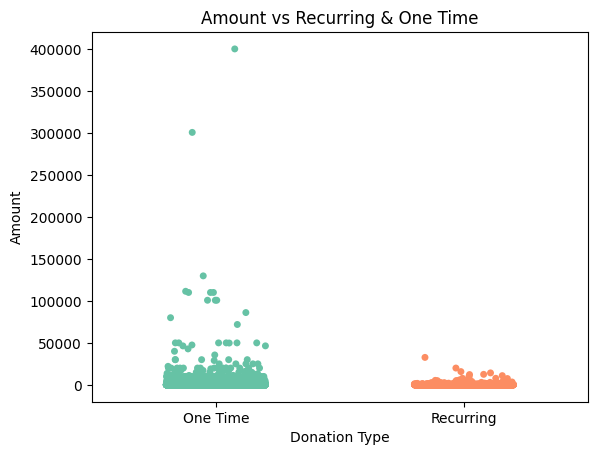

In [9]:
# Visualizing Amount donated by Recurring and One-Time Donations
import seaborn as sns
import matplotlib.pyplot as plt

# Create a strip plot to visualize the distribution of amounts for recurring and one-time donations
sns.stripplot(
    x='Recurring Donation Dummy',  # The categorical variable on the x-axis (0: No, 1: Yes)
    y='Amount',
    data=df,
    jitter=0.2,                    # Adds random noise to avoid overlapping points
    palette="Set2"
)

# Customize the x-axis labels to replace numeric values with "One Time" and "Recurring"
plt.xticks([0, 1], ['One Time', 'Recurring'])

# Update plot labels and title
plt.title('Amount vs Recurring & One Time')
plt.xlabel('Donation Type')  # Updated x-axis label
plt.ylabel('Amount')

# Display the plot
plt.show()


The strip plot provides a visual representation of the distribution of donation amounts across recurring (Yes) and one-time (No) donations.

This visualization helps identify patterns, such as whether recurring donations tend to have higher or lower amounts compared to one-time donations.

Insights from this plot can guide further data analysis or preprocessing steps, such as analyzing trends across additional features like donor demographics.

# Bar Plot Graph

<ipython-input-5-53444cd72be5>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


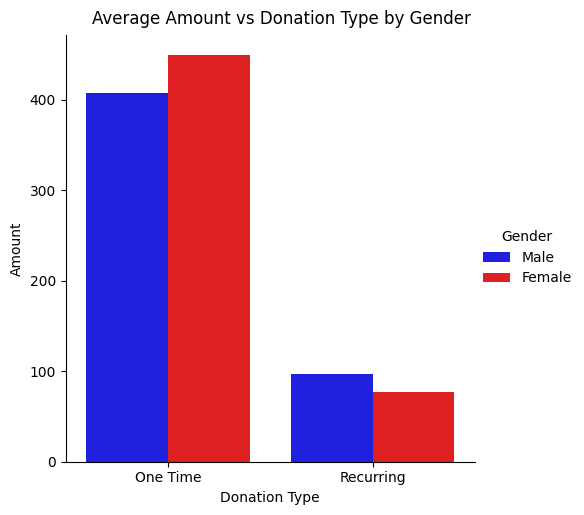

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom palette for Gender
custom_palette = {"Female": "red", "Male": "blue"}

# Create the bar plot with gender differentiation
g = sns.catplot(
    x='Recurring Donation Dummy',  # The categorical variable on the x-axis (0: No, 1: Yes)
    y='Amount',
    hue='Gender',                  # Differentiate genders by color
    data=df,
    kind='bar',
    palette=custom_palette,        # Use the custom color palette
    ci=None                        # Disable confidence intervals
)

# Customize the x-axis labels to replace numeric values with "One Time" and "Recurring"
g.set_xticklabels(['One Time', 'Recurring'])

# Update x-axis and y-axis labels
g.set_axis_labels("Donation Type", "Amount")

# Update the title
g.fig.suptitle('Average Amount vs Donation Type by Gender', y=1.02)  # Adjust title position

# Show the plot
plt.show()


This code visualizes the average donation amounts for ("Recurring") and ("One Time") donations, with genders distinguished by color, using a bar plot.

The plot allows for a direct comparison of donation behavior across genders within each donation type, highlighting potential differences in average amounts contributed by men and women.

Insights from this visualization can help identify trends in donation types and amounts by gender, such as whether men or women tend to donate more through recurring or one-time donations. These findings can guide strategies for gender-specific campaigns or personalized donor engagement efforts.

# Second Cluster Analysis

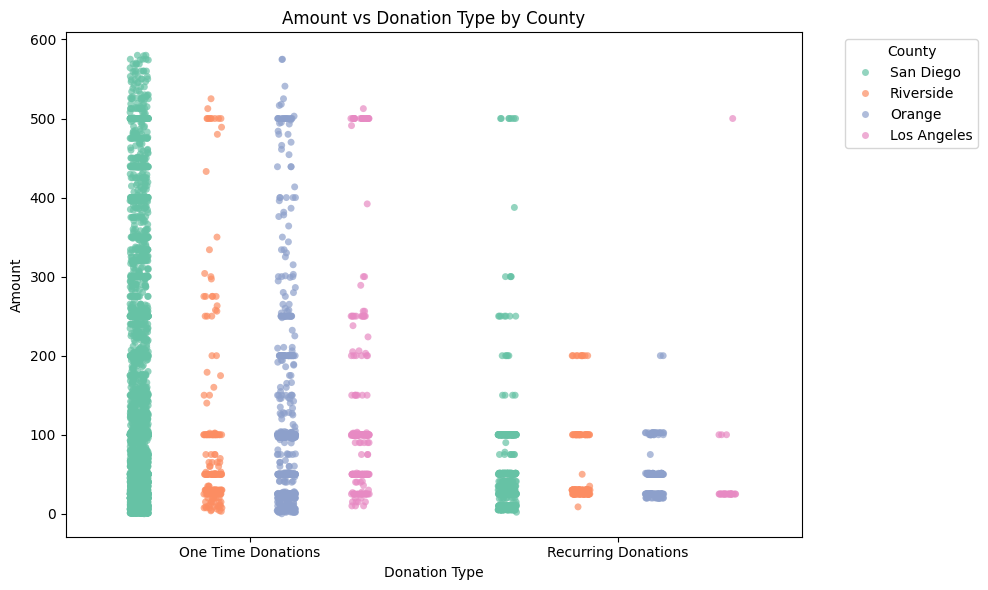

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of counties to show
counties_to_show = ['San Diego', 'Riverside', 'Orange', 'Los Angeles']

# Filter the data to include only the counties in the list
filtered_df = df[df['County'].isin(counties_to_show)]

# Calculate the IQR to filter out outliers in the 'Amount' column
Q1 = filtered_df['Amount'].quantile(0.25)
Q3 = filtered_df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the rows where 'Amount' is outside the outlier bounds
filtered_df_no_outliers = filtered_df[(filtered_df['Amount'] >= lower_bound) & (filtered_df['Amount'] <= upper_bound)]

# Create the strip plot with the filtered data
plt.figure(figsize=(10, 6))  # Set the figure size
sns.stripplot(
    x='Recurring Donation Dummy',
    y='Amount',
    data=filtered_df_no_outliers,
    jitter=True,
    palette="Set2",
    hue='County',  # Color by 'County'
    dodge=True,  # Separate the counties along the x-axis
    marker='o',  # Marker style
    alpha=0.7  # Transparency for points
)

# Adjust the title and layout
plt.title('Amount vs Donation Type by County')
plt.xlabel('Donation Type')
plt.ylabel('Amount')

# Change the x-axis labels
plt.xticks([0, 1], ['One Time Donations', 'Recurring Donations'])

# Add a legend
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


This code filters the dataset to include only specific counties (San Diego, Riverside, Orange, and Los Angeles) and removes outliers in the Amount column using the interquartile range (IQR) method. After filtering, it visualizes the distribution of donation amounts by donation type (One Time and Recurring) for each county using a strip plot.

Insights from this visualization can reveal regional trends in donation behavior, such as whether recurring donations tend to be higher in certain counties or if any counties exhibit unique donation patterns. These findings can support region-specific fundraising strategies or targeted donor outreach efforts.

# Rest of our Analysis

<ipython-input-13-0fde3afddaa4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


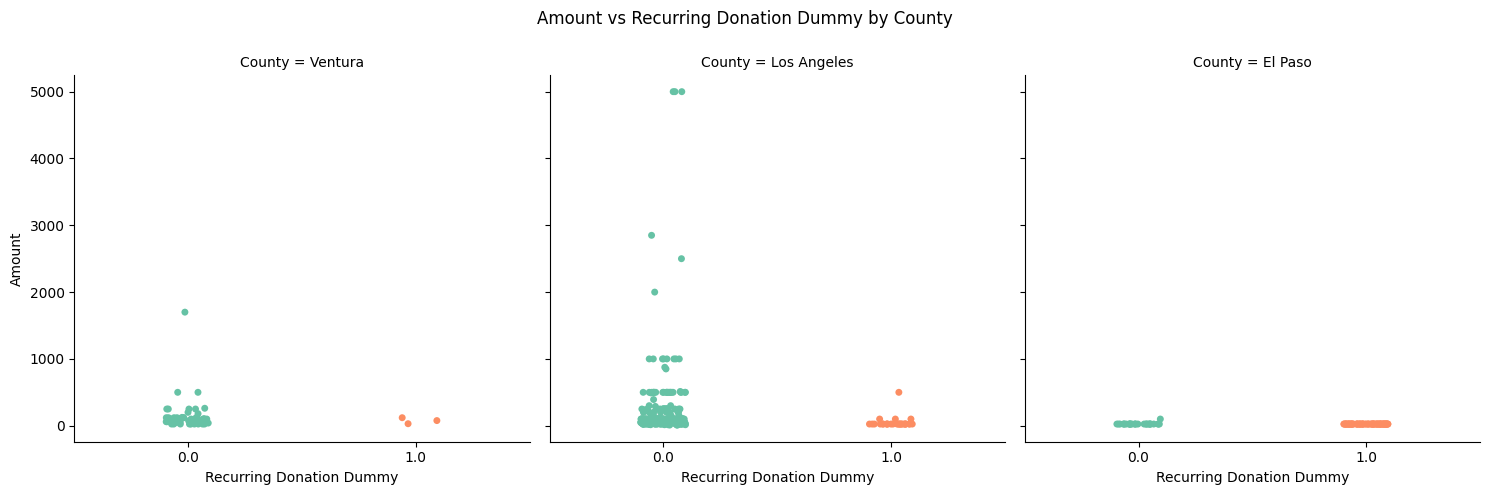

In [13]:
# List of counties to show
counties_to_show = ['Ventura', 'Los Angeles', 'El Paso', ]

# Filter the data to include only the counties in the list
filtered_df = df[df['County'].isin(counties_to_show)]

# Create the strip plot with the filtered data
sns.catplot(
    x='Recurring Donation Dummy',
    y='Amount',
    col='County',
    data=filtered_df,
    kind='strip',
    jitter=True,
    palette="Set2",
    col_wrap=3
)

# Adjust the title and layout
plt.subplots_adjust(top=0.85)
plt.suptitle('Amount vs Recurring Donation Dummy by County')
plt.show()

This code filters the dataset to include only specific counties (Ventura, Los Angeles, and El Paso) and creates a strip plot to visualize the distribution of donation amounts for each county.

The visualization highlights the relationship between donation type (One Time and Recurring) and donation amounts within each selected county. By using jittered points, the plot displays the spread of individual donations while retaining clarity.

Insights from this visualization can help identify regional differences in donation patterns, such as whether recurring donations are consistently higher than one-time donations across counties or if any county stands out with unique trends. These observations can inform tailored outreach and fundraising strategies for different regions.

<ipython-input-14-be8e6a1a15f5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


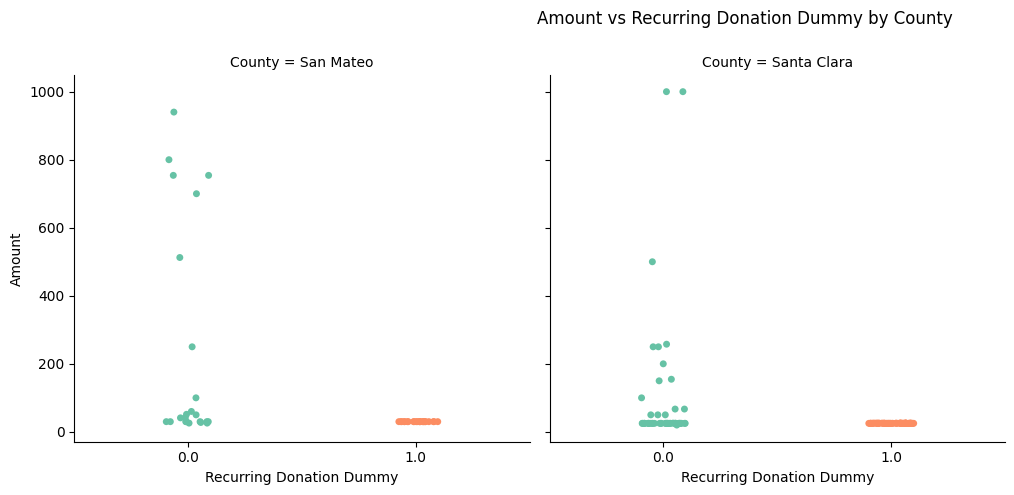

In [14]:
# List of counties to show
counties_to_show = ['San Mateo', 'Santa Clara', 'Beufort']

# Filter the data to include only the counties in the list
filtered_df = df[df['County'].isin(counties_to_show)]

# Create the strip plot with the filtered data
sns.catplot(
    x='Recurring Donation Dummy',
    y='Amount',
    col='County',
    data=filtered_df,
    kind='strip',
    jitter=True,
    palette="Set2",
    col_wrap=3
)

# Adjust the title and layout
plt.subplots_adjust(top=0.85)
plt.suptitle('Amount vs Recurring Donation Dummy by County')
plt.show()

This code filters the dataset to include only the counties San Mateo, Santa Clara, and Beufort and generates a strip plot to visualize the distribution of donation amounts for each county.

The x-axis represents the donation type (One Time or Recurring), while the y-axis displays the donation amounts. Jitter is applied to spread the data points and reduce overlap, making the distribution within each category clearer.

This analysis helps identify differences in donation patterns among the selected counties, such as variations in the average donation amount or the prevalence of recurring versus one-time donations. These insights can guide regional fundraising strategies and highlight areas for targeted donor engagement.